In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from collections import Counter
from sklearn.datasets import make_classification

from numpy import where

import scipy.stats as stats
from scipy.special import inv_boxcox   
import os #we will use the function listdir to list files in a folder
import math
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from scipy import signal
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
customer_df.columns = customer_df.columns.str.lower().str.replace(" ", "_")
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [8]:
round((customer_df.isna().sum()/len(customer_df)*100),2)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [9]:
customer_df.customer.unique()

array(['BU79786', 'QZ44356', 'AI49188', ..., 'TD14365', 'UP19263',
       'Y167826'], dtype=object)

In [10]:
numericals = customer_df.select_dtypes(np.number)

In [11]:
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [12]:
for column in numericals:
    print(numericals[column].unique())

[ 2763.519279  6979.535903 12887.43165  ...  8163.890428  7524.442436
  2611.836866]
[56274     0 48767 ... 66367 71941 21941]
[ 69  94 108 106  73  67 101  71  93 110  70  64  72  74  79  61 111 139
  80  63 237  65  62 117  91  90  66  99 103 172  92 104 113 124 105 100
 112  97  95 102 186  77  96  76 119  88 109 107 130  85  98 133  86  78
  83  68 192 118  89 140 127 168 126  82 115 217 114 138  81 255 150 123
 116 190 159  84 152 136 245 135 128 225 132 153 121 154 161 156 171  87
 244 183 176 230 129 177 196 131 276 253 137 180 203 147 165 198 125 193
 271 188 142 206 182 189 160 295 210 134 239 256 173 285 148 197 199 214
 175 167 194 164 181 222 215 283 169 248 223 273 151 213 145 185 287 297
 201 149 146 235 268 211 187 141 242 170 122 143 155 166 212 249 240 191
 195 216 144 179 232 158 207 184 238 229 220 178 204 281 234 218 275 209
 261 157 205 228 284 231 208 296 202 162 274 219 247 290 226 163 298 266
 254 252 174 286]
[32 13 18 12 14  0 17 23 27  9 21 11 31  8  4 30 22 

In [13]:
for column in numericals:
    print(len(numericals[column].unique()))

8041
5694
202
36
100
6
9
5106


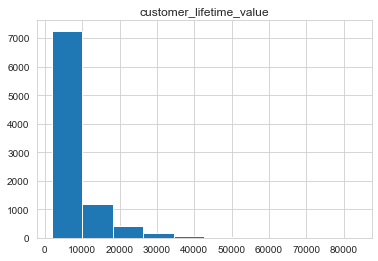

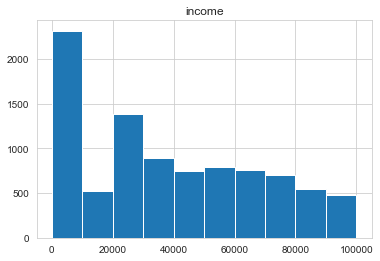

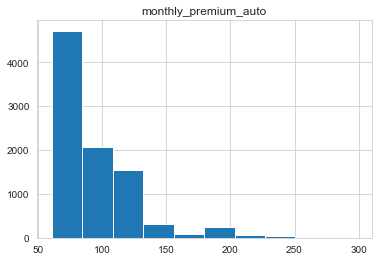

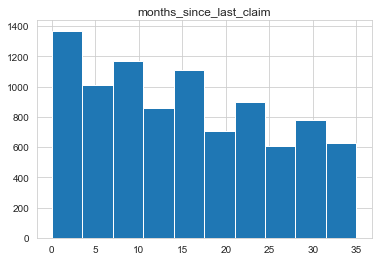

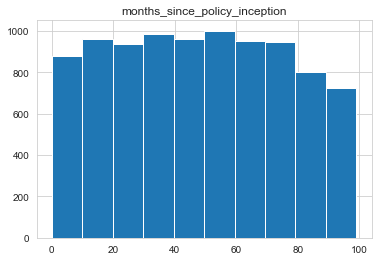

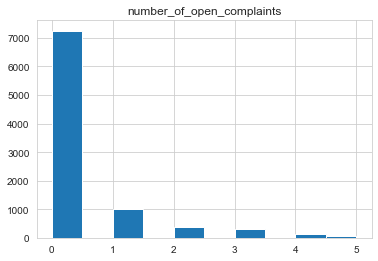

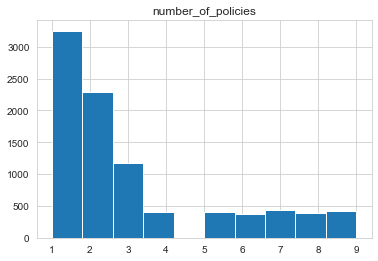

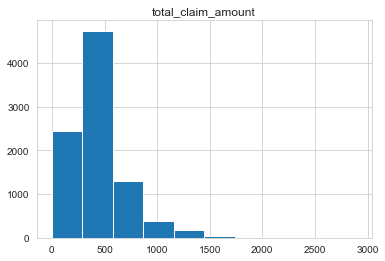

In [14]:
for column in numericals:
    numericals[column].hist()
    plt.title(column)
    plt.show()

In [15]:
def check_dtypes(numericals):
    test = numericals.dtypes
    x=0
    for i in range (len(numericals.columns)):
        print(test[x]," ", numericals.iloc[0][numericals.columns[i]]," ",numericals.columns[i])
        x+=1
    return()

In [16]:
check_dtypes(numericals)

float64   2763.519279   customer_lifetime_value
int64   56274.0   income
int64   69.0   monthly_premium_auto
int64   32.0   months_since_last_claim
int64   5.0   months_since_policy_inception
int64   0.0   number_of_open_complaints
int64   1.0   number_of_policies
float64   384.811147   total_claim_amount


()

In [17]:
numericals['income'] = numericals['income'].astype(float)
numericals['monthly_premium_auto'] = numericals['income'].astype(float)
check_dtypes(numericals)

float64   2763.519279   customer_lifetime_value
float64   56274.0   income
float64   56274.0   monthly_premium_auto
int64   32.0   months_since_last_claim
int64   5.0   months_since_policy_inception
int64   0.0   number_of_open_complaints
int64   1.0   number_of_policies
float64   384.811147   total_claim_amount


()

In [18]:
def to_dict(df):
    for col in df.columns:
        if df[col].dtypes == 'int64':
            df1 = df.select_dtypes(include='int64')
            discrete = df1.to_dict()
        else:
            df2 = df.select_dtypes(include='float64')
            continuous = df2.to_dict()
    return continuous, discrete

In [19]:
continuous, discrete = to_dict(numericals)

In [20]:
type(discrete)

dict

In [21]:
discrete.keys()

dict_keys(['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies'])

In [22]:
continuous.keys()

dict_keys(['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount'])

In [23]:
cat = customer_df.select_dtypes(np.object)
cat.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [24]:
for column in cat:
    print(cat[column].unique())

['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
['Offer1' 'Offer3' 'Offer2' 'Offer4']
['Agent' 'Call Center' 'Web' 'Branch']
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
['Medsize' 'Small' 'Large']


In [25]:
for column in cat:
    print(len(cat[column].unique()))

9134
5
2
3
5
5
2
3
3
3
9
4
4
6
3


In [26]:
check_dtypes(cat)

object   BU79786   customer
object   Washington   state
object   No   response
object   Basic   coverage
object   Bachelor   education
object   Employed   employmentstatus
object   F   gender
object   Suburban   location_code
object   Married   marital_status
object   Corporate Auto   policy_type
object   Corporate L3   policy
object   Offer1   renew_offer_type
object   Agent   sales_channel
object   Two-Door Car   vehicle_class
object   Medsize   vehicle_size


()

In [27]:
cat_dict = cat.to_dict()

In [28]:
cat_dict.keys()

dict_keys(['customer', 'state', 'response', 'coverage', 'education', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'])

In [29]:
discrete_df = pd.DataFrame.from_dict(discrete)

In [30]:
discrete_df.head

<bound method NDFrame.head of       months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies  
0                             0                   1  
1                             0                   8  
2                             0        

In [31]:
continuous_df = pd.DataFrame.from_dict(continuous)

In [32]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274.0,56274.0,384.811147
1,6979.535903,0.0,0.0,1131.464935
2,12887.431650,48767.0,48767.0,566.472247
3,7645.861827,0.0,0.0,529.881344
4,2813.692575,43836.0,43836.0,138.130879


In [33]:
customer_df = customer_df.set_index('customer')
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [34]:
cat = cat.set_index('customer')
cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [35]:
continuous_df.corr()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.024366,0.226451
income,0.024366,1.000000,1.000000,-0.355254
monthly_premium_auto,0.024366,1.000000,1.000000,-0.355254
total_claim_amount,0.226451,-0.355254,-0.355254,1.000000


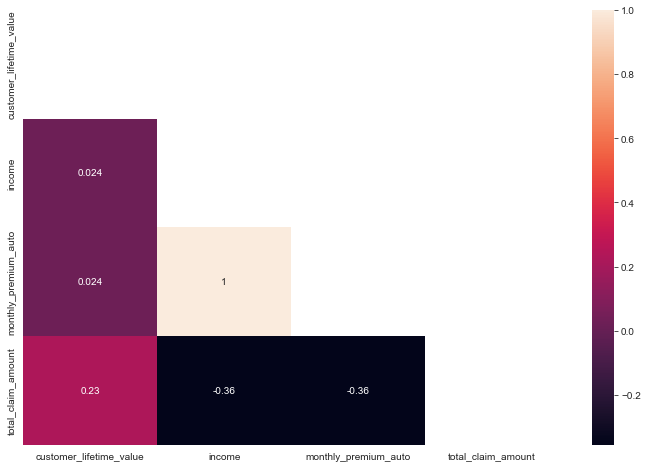

In [36]:
mask = np.zeros_like(continuous_df.corr())
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(continuous_df.corr(), mask=mask, annot=True)
plt.show()

In [37]:
discrete_df.corr()

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
months_since_last_claim,1.000000,-0.042959,0.005354,0.009136
months_since_policy_inception,-0.042959,1.000000,-0.001158,-0.013333
number_of_open_complaints,0.005354,-0.001158,1.000000,0.001498
number_of_policies,0.009136,-0.013333,0.001498,1.000000


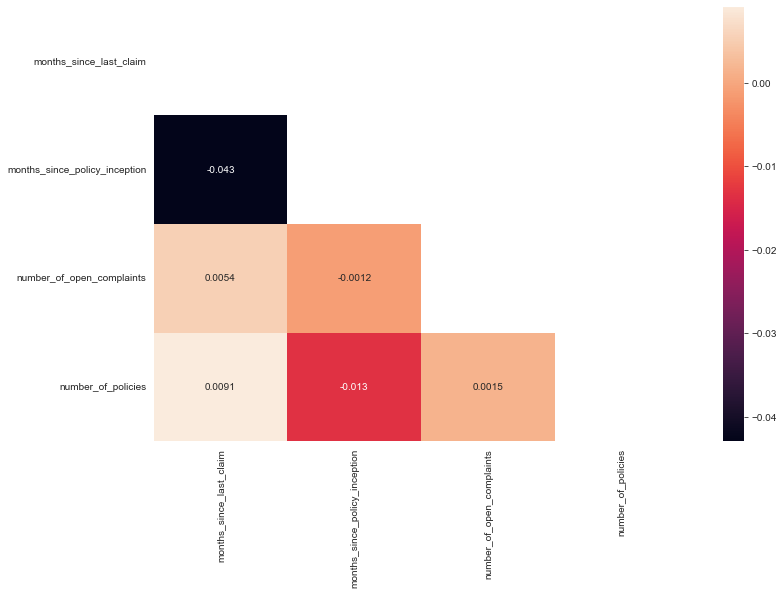

In [38]:
mask = np.zeros_like(discrete_df.corr())
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(discrete_df.corr(), mask=mask, annot=True)
plt.show()

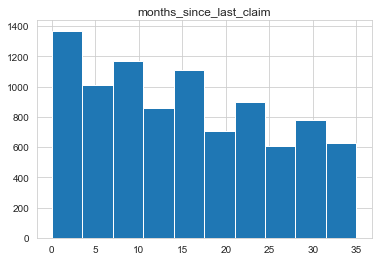

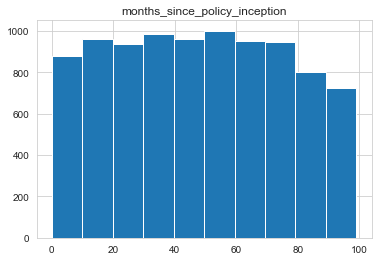

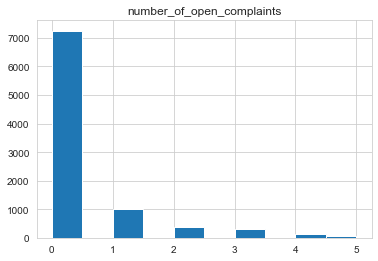

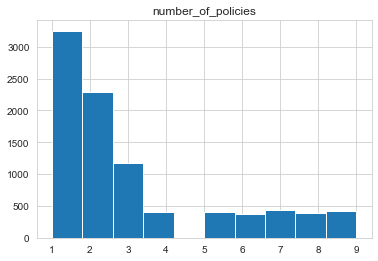

In [39]:
for column in discrete_df:
    discrete_df[column].hist()
    plt.title(column)
    plt.show()

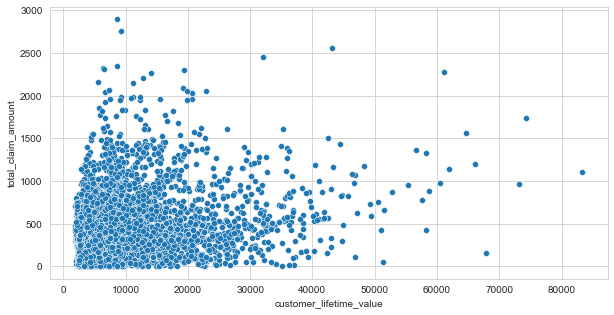

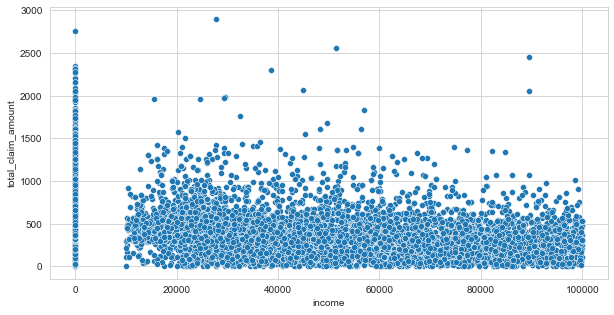

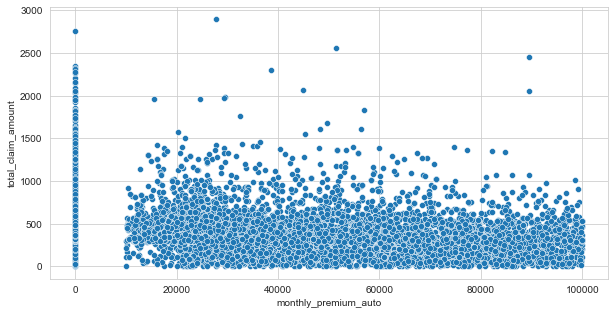

In [40]:
cols_to_include = continuous_df.loc[:, continuous_df.columns != 'total_claim_amount']
for column in cols_to_include:
    plt.figure(figsize=(10,5))
    sns.scatterplot(continuous_df[column],continuous_df['total_claim_amount'])
    plt.show()

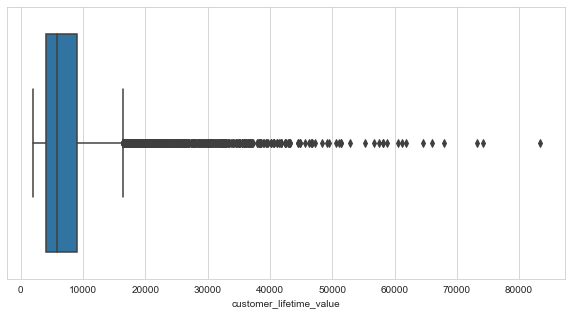

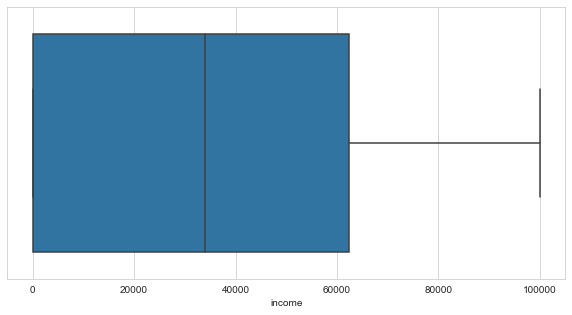

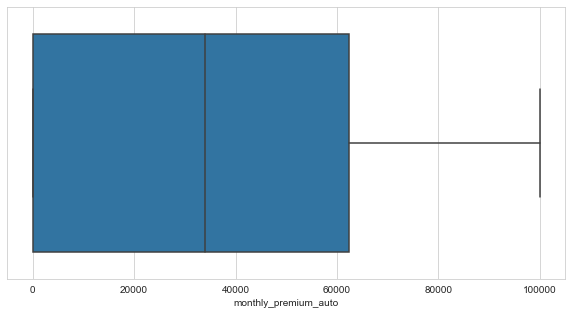

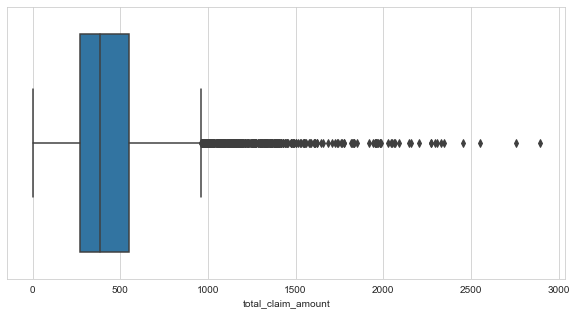

In [41]:
for col in continuous_df:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=continuous_df[col])
    plt.show()

In [42]:
def boxcox_transform(data):
    numeric_cols = data.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        data[column] = np.where(data[column]<=0, np.NAN, data[column]) 
        data[column] = data[column].fillna(data[column].median())
        transformed_data, ci = stats.boxcox(data[column])
        data[column] = transformed_data
        _ci[column] = [ci] 
    return data, _ci

In [43]:
continuous, _ci = boxcox_transform(continuous_df)
continuous.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2.703839,655.751046,655.751046,33.035752
1,2.754926,602.540450,602.540450,56.357614
2,2.780772,607.149530,607.149530,40.071789
3,2.759125,602.540450,602.540450,38.763252
4,2.704995,573.312721,573.312721,19.560154


In [44]:
def remove_outliers(df, threshold=1.5):
    numerical = df.select_dtypes(np.number)
    columns = numerical.columns
    for column in columns:
        if len(df[column].unique()) < 10:
            continue
        else:
            upper = np.percentile(df[column], 75)
            lower = np.percentile(df[column], 25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

In [45]:
continuous = remove_outliers(continuous, threshold=1.5)

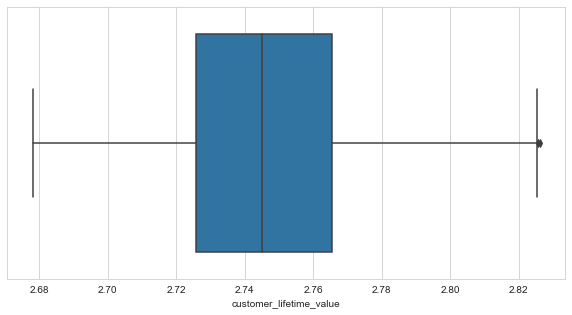

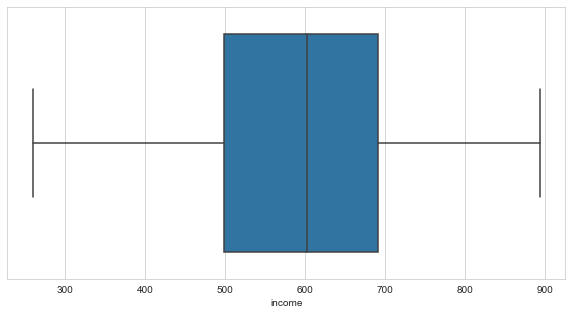

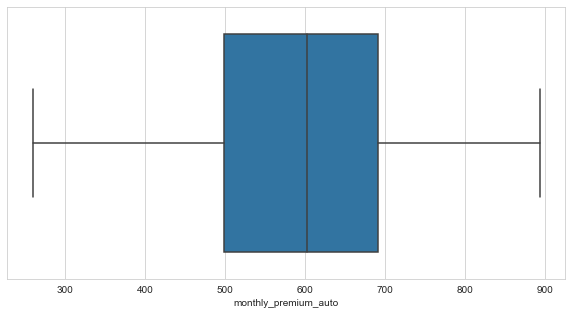

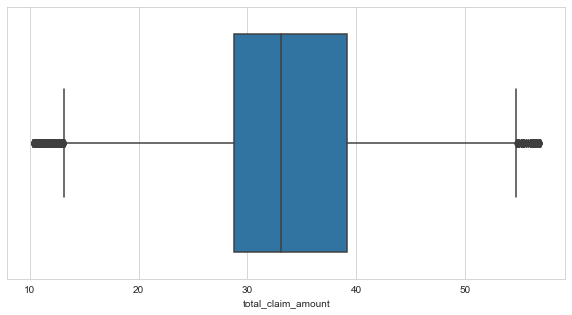

In [46]:
for col in continuous:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=continuous[col])
    plt.show()

In [47]:
def check_nan(df):
    nulls = pd.DataFrame(df.isna().sum()/len(df))
    nulls= nulls.reset_index()
    nulls.columns = ['column_name', 'Percentage Null Values']
    nulls.sort_values(by='Percentage Null Values', ascending = False)
    return nulls

In [48]:
cont = check_nan(continuous)
cont

,column_name,Percentage Null Values
0,customer_lifetime_value,0.0
1,income,0.0
2,monthly_premium_auto,0.0
3,total_claim_amount,0.0


In [49]:
disc = check_nan(discrete_df)

In [50]:
disc

,column_name,Percentage Null Values
0,months_since_last_claim,0.0
1,months_since_policy_inception,0.0
2,number_of_open_complaints,0.0
3,number_of_policies,0.0


In [51]:
cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [52]:
for col in cat:
    x = cat[col].unique()
    print(x)

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
['Offer1' 'Offer3' 'Offer2' 'Offer4']
['Agent' 'Call Center' 'Web' 'Branch']
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
['Medsize' 'Small' 'Large']


In [53]:
cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


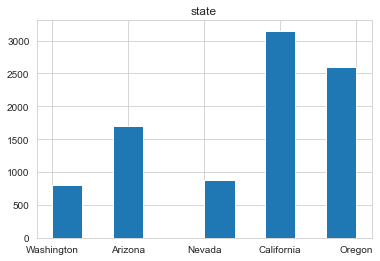

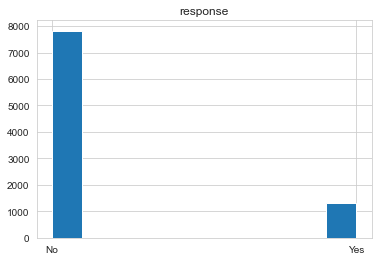

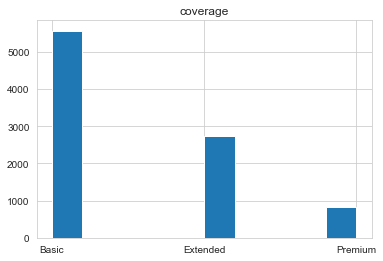

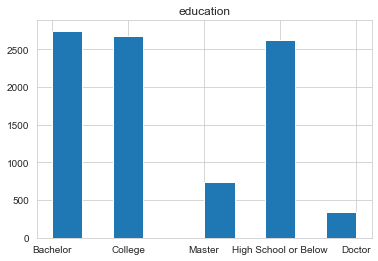

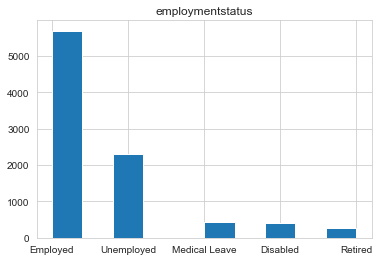

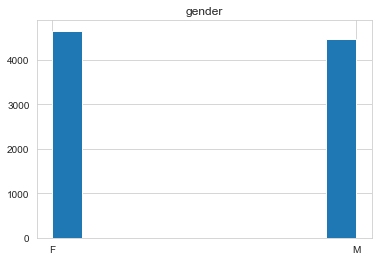

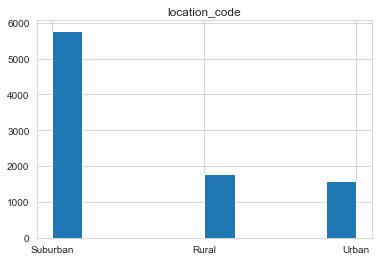

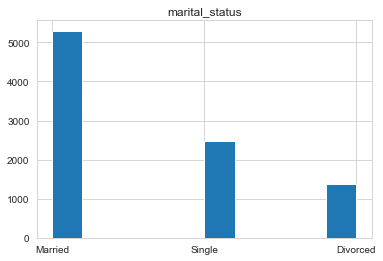

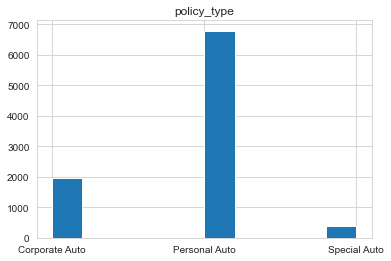

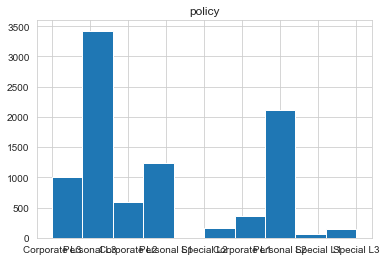

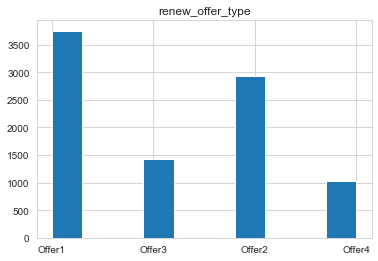

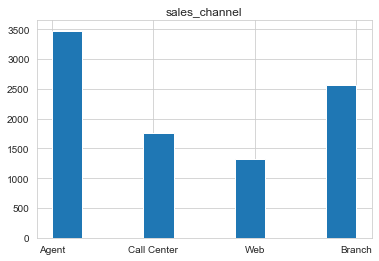

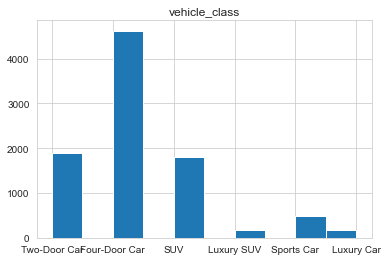

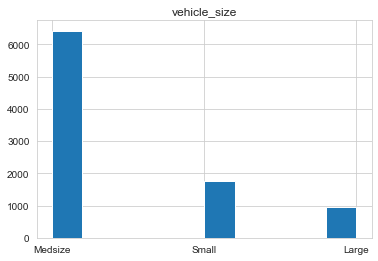

In [54]:
for col in cat:
    cat[col].hist()
    plt.title(col)
    plt.show()

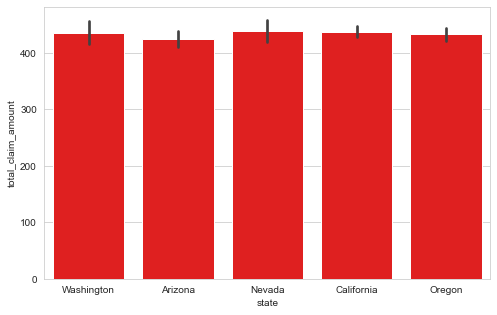

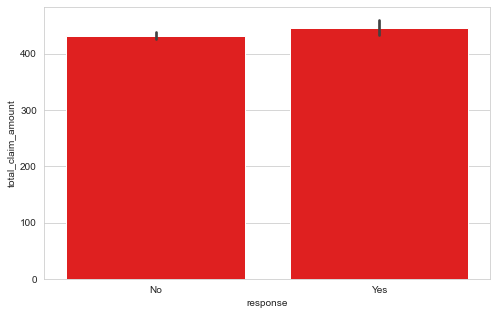

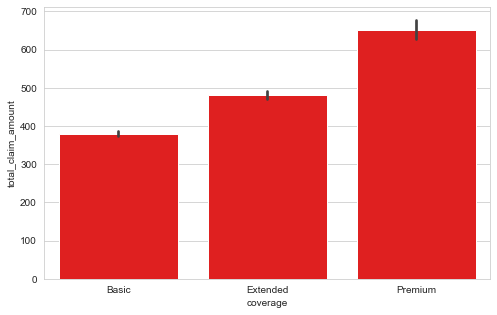

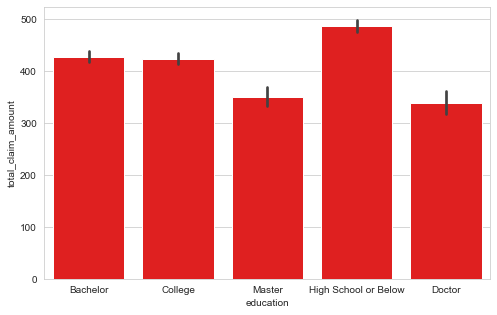

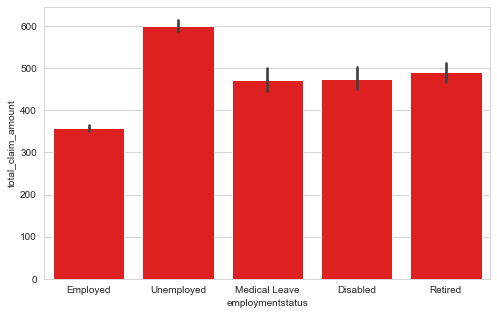

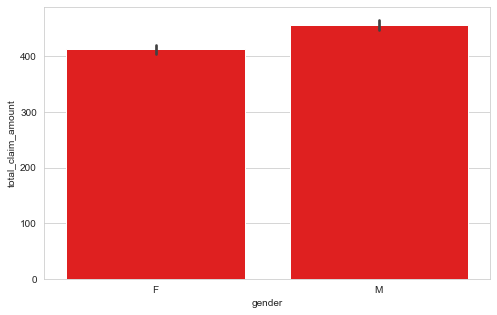

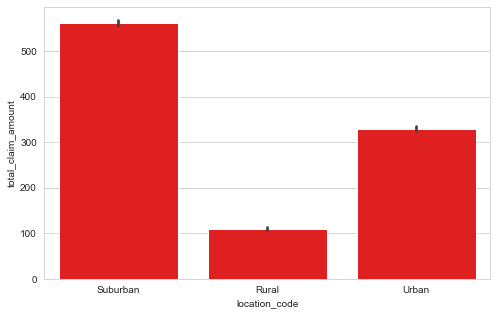

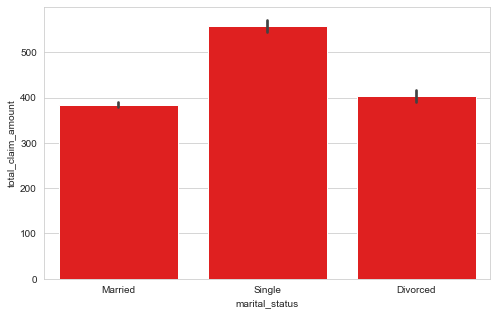

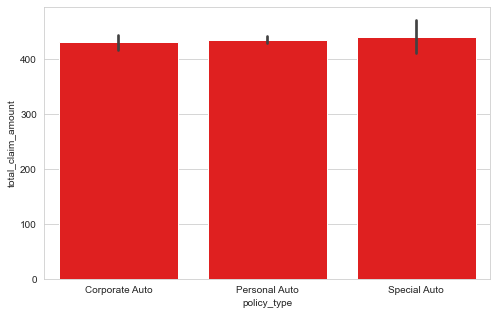

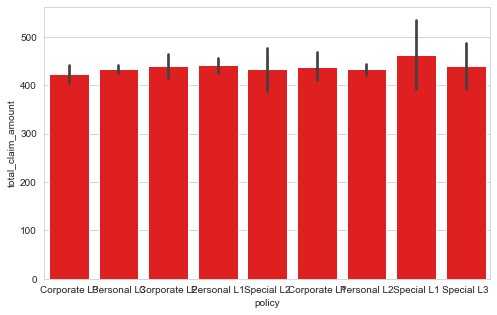

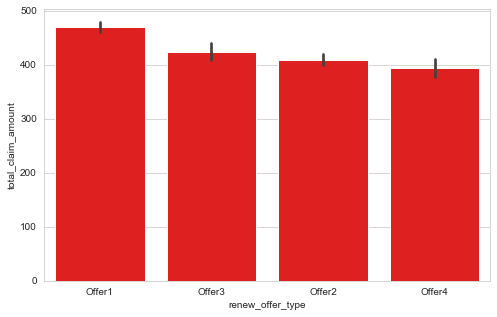

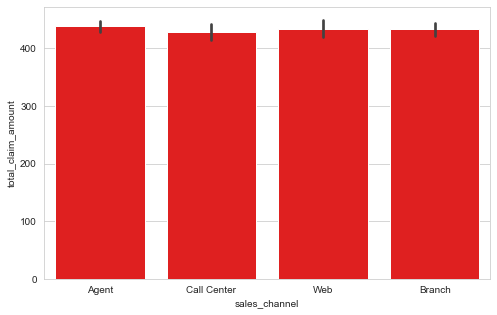

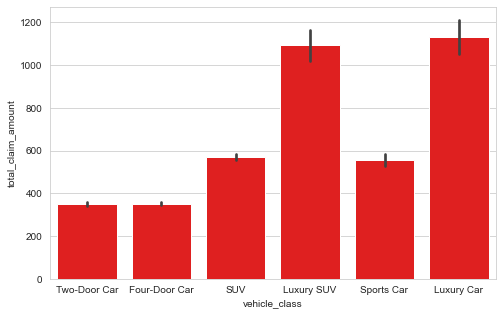

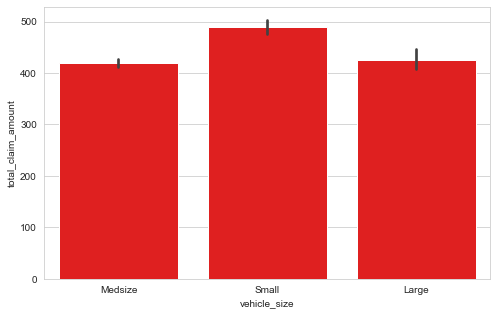

In [55]:
for col in cat:
    plt.figure(figsize=(8,5))
    sns.barplot(x=cat[col],y=customer_df['total_claim_amount'], color='red')

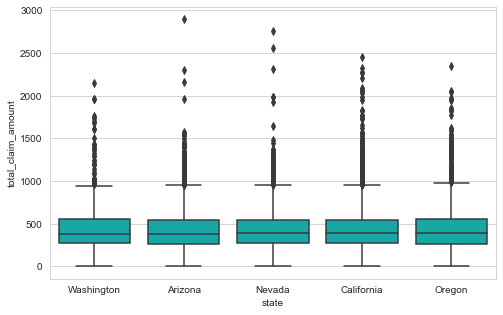

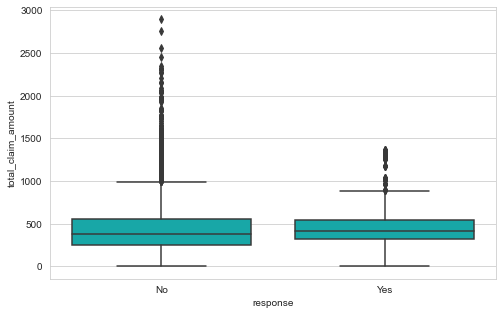

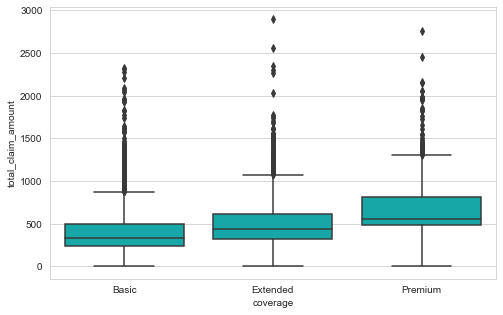

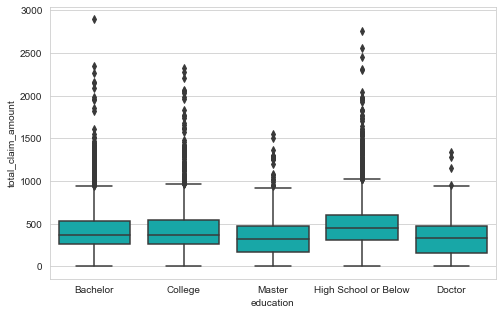

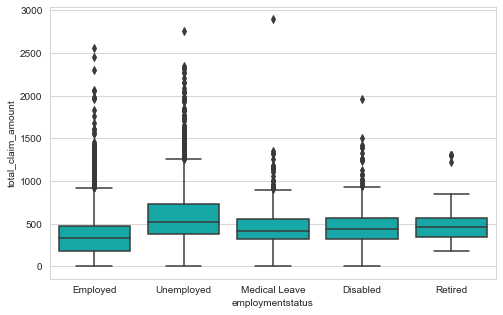

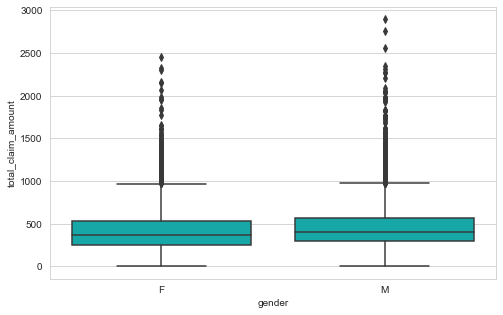

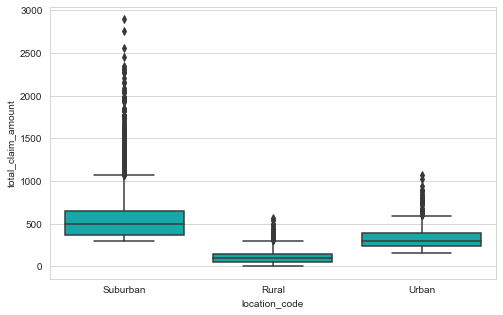

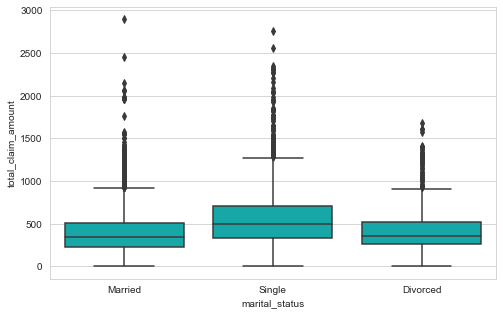

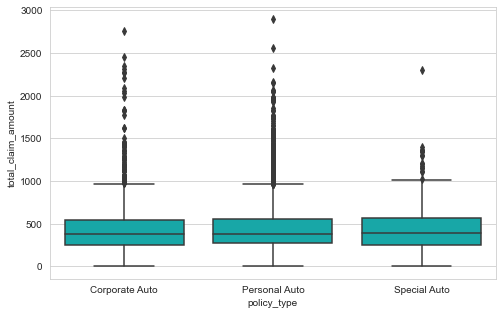

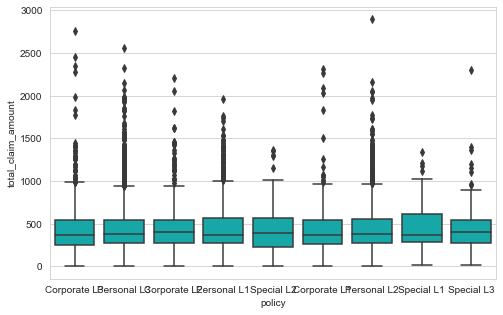

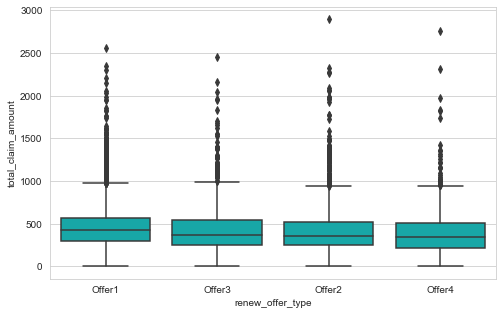

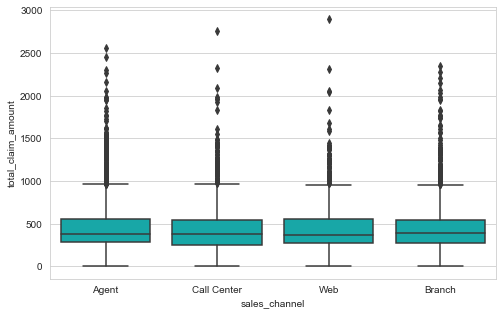

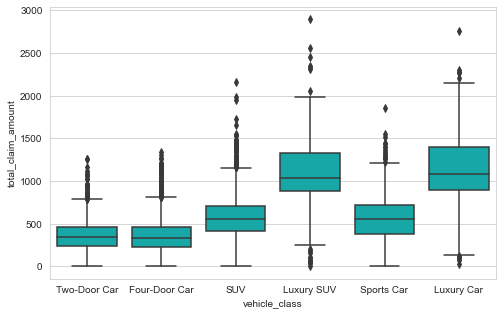

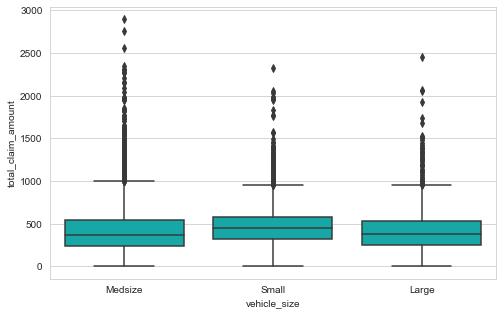

In [56]:
for col in cat:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=cat[col], y=customer_df['total_claim_amount'], color='c')
    plt.show()

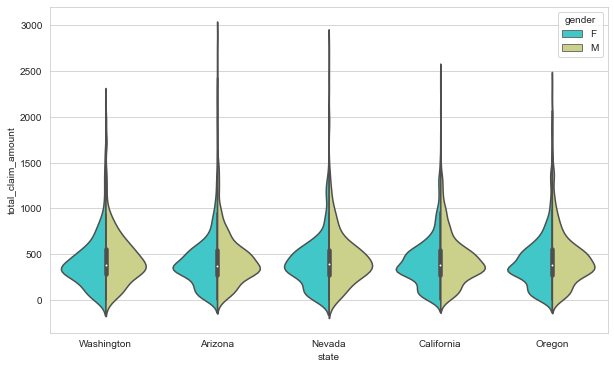

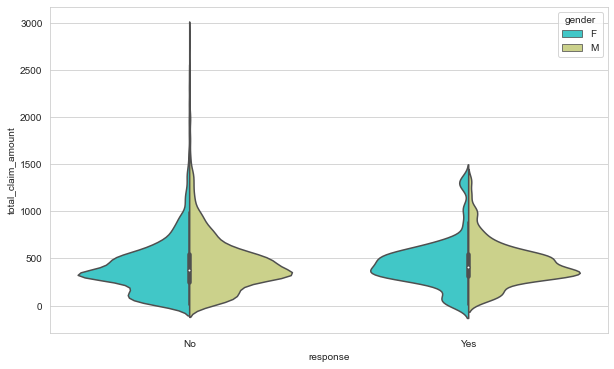

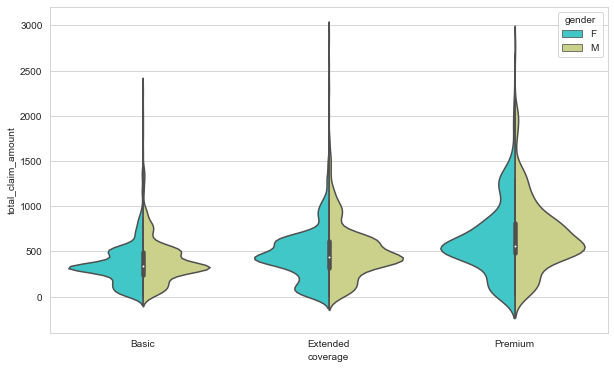

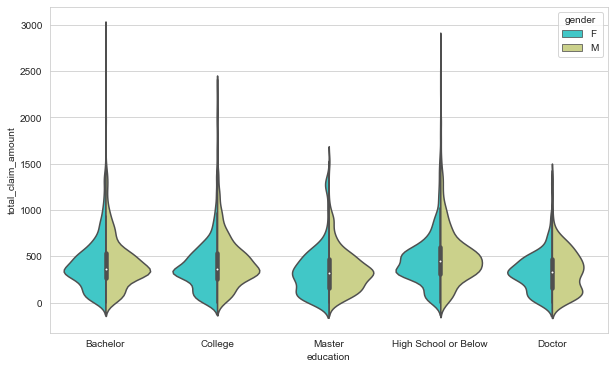

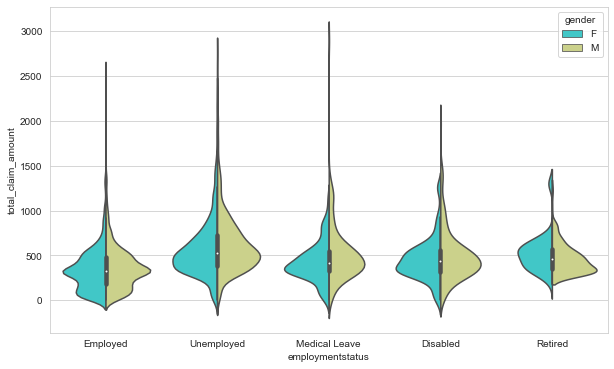

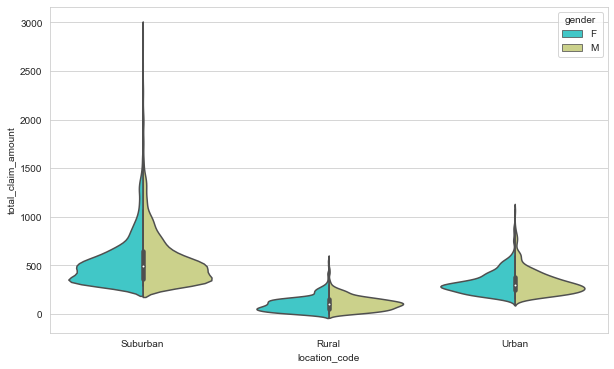

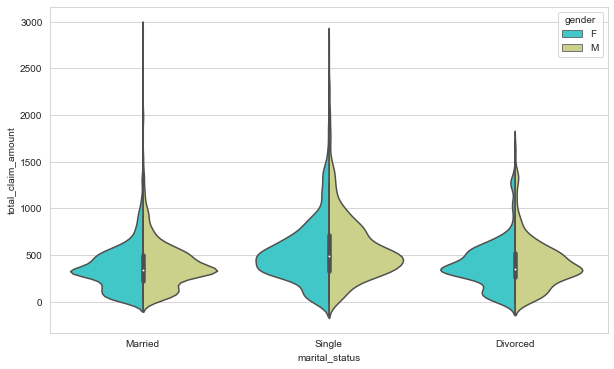

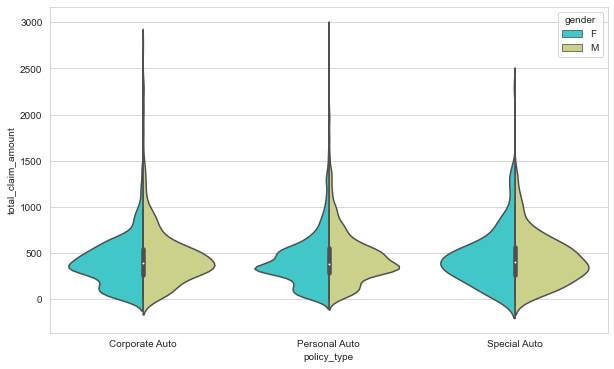

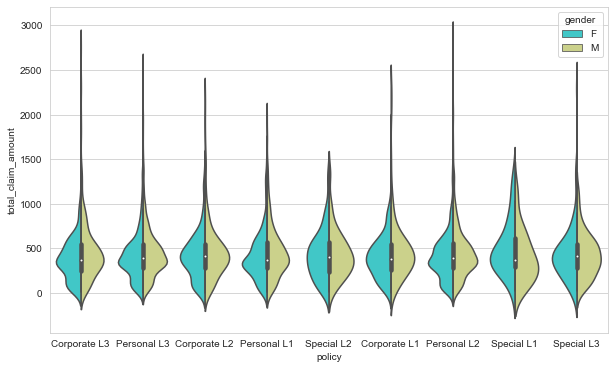

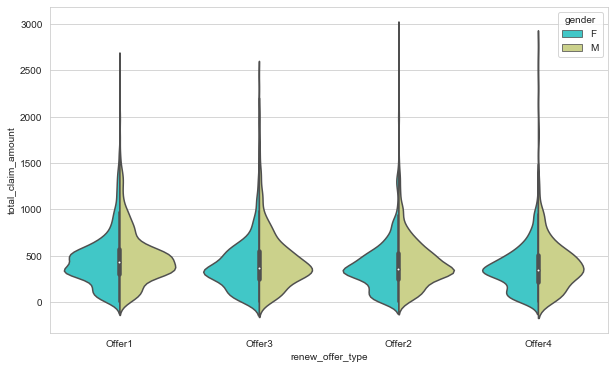

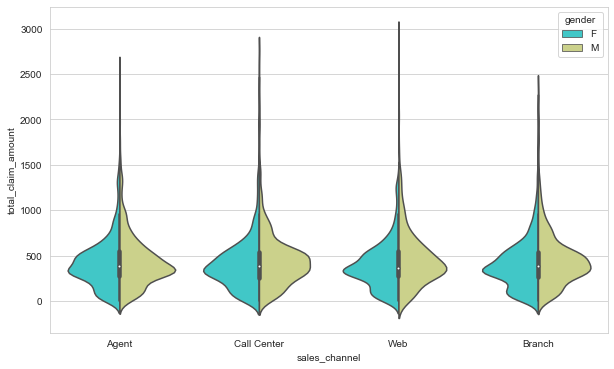

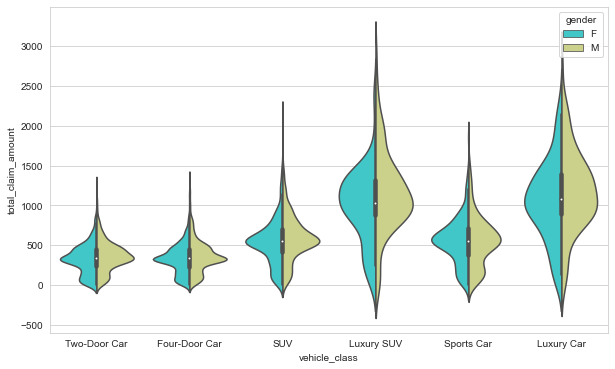

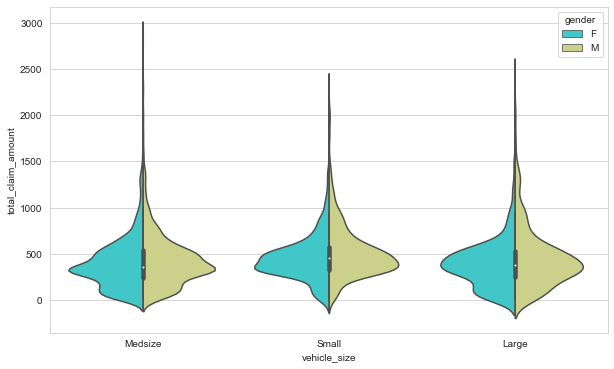

In [57]:
cats_to_include = cat.loc[:, cat.columns != 'gender']
for col in cats_to_include:
    plt.figure(figsize=(10,6))
    sns.violinplot(x=cat[col],y=customer_df['total_claim_amount'], hue=cat['gender'], split='True', palette='rainbow')
    plt.show

In [58]:
cat = cat.drop(['gender','policy_type','vehicle_size'], axis=1)
cat.head()

,state,response,coverage,education,employmentstatus,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class
customer,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car
AI49188,Nevada,No,Premium,Bachelor,Employed,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car
WW63253,California,No,Basic,Bachelor,Unemployed,Suburban,Married,Corporate L2,Offer1,Call Center,SUV
HB64268,Washington,No,Basic,Bachelor,Employed,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car


In [59]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer_lifetime_value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective_to_date              9134 non-null   datetime64[ns]
 6   employmentstatus               9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   int64         
 9   location_code                  9134 non-null   object        
 10  marital_status                 9134 non-null   object        
 11  monthly_premi

In [60]:
customer_df.effective_to_date.unique()

array(['2011-02-24T00:00:00.000000000', '2011-01-31T00:00:00.000000000',
       '2011-02-19T00:00:00.000000000', '2011-01-20T00:00:00.000000000',
       '2011-02-03T00:00:00.000000000', '2011-01-25T00:00:00.000000000',
       '2011-01-18T00:00:00.000000000', '2011-01-26T00:00:00.000000000',
       '2011-02-17T00:00:00.000000000', '2011-02-21T00:00:00.000000000',
       '2011-01-06T00:00:00.000000000', '2011-02-06T00:00:00.000000000',
       '2011-01-10T00:00:00.000000000', '2011-01-17T00:00:00.000000000',
       '2011-01-05T00:00:00.000000000', '2011-02-27T00:00:00.000000000',
       '2011-01-14T00:00:00.000000000', '2011-01-21T00:00:00.000000000',
       '2011-02-05T00:00:00.000000000', '2011-01-29T00:00:00.000000000',
       '2011-02-28T00:00:00.000000000', '2011-02-12T00:00:00.000000000',
       '2011-02-02T00:00:00.000000000', '2011-02-07T00:00:00.000000000',
       '2011-01-22T00:00:00.000000000', '2011-02-13T00:00:00.000000000',
       '2011-01-15T00:00:00.000000000', '2011-01-08

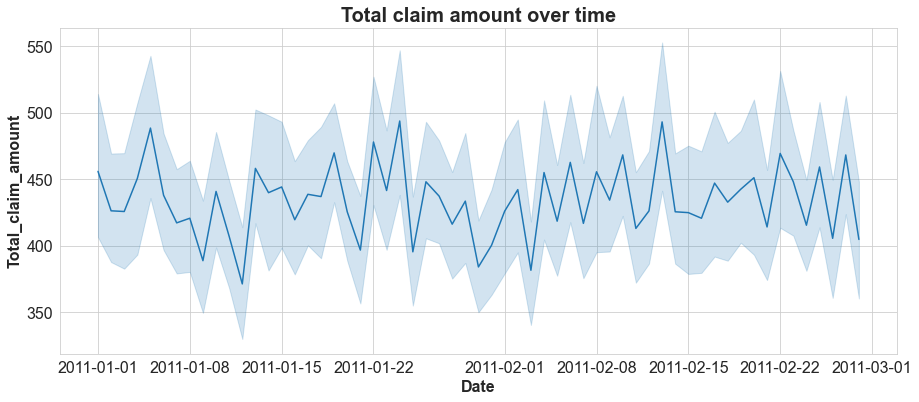

In [61]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(customer_df['effective_to_date'], customer_df['total_claim_amount'] )

ax.set_title('Total claim amount over time', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Total_claim_amount', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

In [62]:
time_plot = customer_df.copy()

In [63]:
time_plot['month']= time_plot['effective_to_date'].dt.month
time_plot['day']= time_plot['effective_to_date'].dt.day
time_plot.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month,day
customer,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2,24
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1,31
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2,19
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1,20
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2,3


Text(0, 0.5, 'Total Claim Amount')

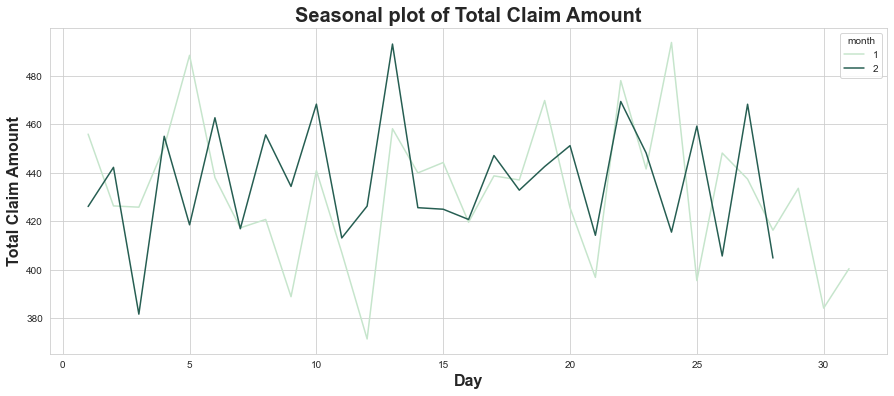

In [64]:
fig, ax = plt.subplots(figsize=(15, 6))

palette = sns.color_palette("ch:2.5,-.2,dark=.3", 2)
sns.lineplot(time_plot['day'], time_plot['total_claim_amount'], hue=time_plot['month'], palette=palette, ci=None)
ax.set_title('Seasonal plot of Total Claim Amount', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Day', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Total Claim Amount', fontsize = 16, fontdict=dict(weight='bold'))

In [67]:
def remove_outliers(df, threshold=1.5):
    numerical = df.select_dtypes(np.number)
    columns = numerical.columns
    for column in columns:
        if len(df[column].unique()) < 10:
            continue
        else:
            upper = np.percentile(df[column], 75)
            lower = np.percentile(df[column], 25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

In [68]:
data_copy = customer_df.copy()

In [69]:
transformer = StandardScaler().fit(continuous)
x_standardized = transformer.transform(continuous)
X = pd.DataFrame(x_standardized)
X.columns = continuous.columns
X.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,-1.381619,0.398740,0.398740,-0.005915
1,0.296656,0.026017,0.026017,2.454738
2,1.145735,0.058302,0.058302,0.736446
3,0.434579,0.026017,0.026017,0.598385
4,-1.343642,-0.178714,-0.178714,-1.427704


In [70]:
len(discrete_df)-len(X)

607

In [71]:
X.reset_index(drop=True, inplace=True)
discrete_df.reset_index(drop=True, inplace=True)
numerical_df = pd.merge(X, discrete_df, how='left', left_index=True, right_index=True)
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-1.381619,0.398740,0.398740,-0.005915,32,5,0,1
1,0.296656,0.026017,0.026017,2.454738,13,42,0,8
2,1.145735,0.058302,0.058302,0.736446,18,38,0,2
3,0.434579,0.026017,0.026017,0.598385,18,65,0,7
4,-1.343642,-0.178714,-0.178714,-1.427704,12,44,0,1
...,...,...,...,...,...,...,...,...
8522,1.815812,1.047214,1.047214,-1.002637,23,20,0,2
8523,-1.145413,-1.450862,-1.450862,-0.031532,14,92,0,4
8524,0.531085,0.026017,0.026017,1.495256,13,19,0,1
8525,0.410679,-1.427885,-1.427885,1.174661,8,5,1,2


In [72]:
cat_encoded = pd.get_dummies(cat, columns=cat.columns, drop_first=True)
cat_encoded.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
QZ44356,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
AI49188,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
WW63253,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
HB64268,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
cat_encoded.shape

(9134, 38)

In [74]:
time_plot.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month,day
customer,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2,24
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1,31
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2,19
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1,20
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2,3


In [75]:
data_copy['month']= data_copy['effective_to_date'].dt.month
data_copy['day']= data_copy['effective_to_date'].dt.day
data_copy = data_copy.drop(['effective_to_date'], axis=1)

In [76]:
data_copy.head()

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month,day
customer,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2,24
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1,31
AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2,19
WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1,20
HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2,3


In [77]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(data_copy[['state', 'marital_status','policy_type','policy','renew_offer_type', 'sales_channel','vehicle_class']])
encoded = encoder.transform(data_copy[['state', 'marital_status','policy_type','policy','renew_offer_type', 'sales_channel','vehicle_class']]).toarray()
encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [78]:
encoded_cat = pd.DataFrame(encoded)
encoded_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9131,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9132,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
encoded_cat.columns = encoder.get_feature_names()

In [80]:
encoded_cat

,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Married,x1_Single,x2_Personal Auto,x2_Special Auto,x3_Corporate L2,x3_Corporate L3,x3_Personal L1,x3_Personal L2,x3_Personal L3,x3_Special L1,x3_Special L2,x3_Special L3,x4_Offer2,x4_Offer3,x4_Offer4,x5_Branch,x5_Call Center,x5_Web,x6_Luxury Car,x6_Luxury SUV,x6_SUV,x6_Sports Car,x6_Two-Door Car
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9131,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9132,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
ordinal = data_copy[['coverage','employmentstatus','location_code','vehicle_size']]
ordinal

,coverage,employmentstatus,location_code,vehicle_size
customer,,,,
BU79786,Basic,Employed,Suburban,Medsize
QZ44356,Extended,Unemployed,Suburban,Medsize
AI49188,Premium,Employed,Suburban,Medsize
WW63253,Basic,Unemployed,Suburban,Medsize
HB64268,Basic,Employed,Rural,Medsize
...,...,...,...,...
LA72316,Basic,Employed,Urban,Medsize
PK87824,Extended,Employed,Suburban,Medsize
TD14365,Extended,Unemployed,Suburban,Medsize


In [82]:
ordinal.coverage.value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [83]:
cov_dict = {'Basic':0,
            'Extended':1,
            'Premium':2}


ordinal['coverage'] = ordinal['coverage'].map(cov_dict)


ordinal

,coverage,employmentstatus,location_code,vehicle_size
customer,,,,
BU79786,0,Employed,Suburban,Medsize
QZ44356,1,Unemployed,Suburban,Medsize
AI49188,2,Employed,Suburban,Medsize
WW63253,0,Unemployed,Suburban,Medsize
HB64268,0,Employed,Rural,Medsize
...,...,...,...,...
LA72316,0,Employed,Urban,Medsize
PK87824,1,Employed,Suburban,Medsize
TD14365,1,Unemployed,Suburban,Medsize


In [84]:
ordinal.employmentstatus.value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [85]:
count_emp = pd.DataFrame(ordinal['employmentstatus'].value_counts())
count_emp = count_emp.reset_index()
count_emp.columns = ['status', 'counts']
other_df = count_emp[count_emp['counts']<500]
other_df = list(other_df['status'])
other_df

['Medical Leave', 'Disabled', 'Retired']

In [86]:
def clean_employement_status(x):
    if x in other_df:
        return 'Other'
    else:
        return x

ordinal['employmentstatus'] = list(map(clean_employement_status, ordinal['employmentstatus']))
ordinal.employmentstatus.value_counts()

Employed      5698
Unemployed    2317
Other         1119
Name: employmentstatus, dtype: int64

<AxesSubplot:xlabel='employmentstatus', ylabel='total_claim_amount'>

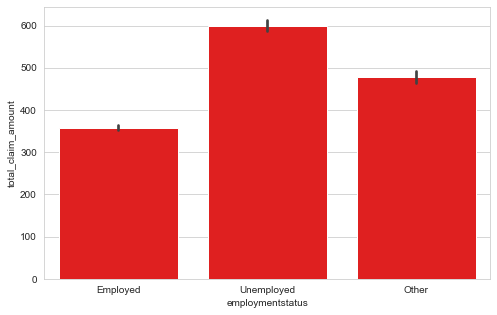

In [87]:
plt.figure(figsize=(8,5))
sns.barplot(x=ordinal['employmentstatus'],y=customer_df['total_claim_amount'], color='red')

In [88]:
emp_dict = {'Unemployed':0,
            'Other':1,
            'Employed':2}


ordinal['employmentstatus'] = ordinal['employmentstatus'].map(emp_dict)


ordinal

,coverage,employmentstatus,location_code,vehicle_size
customer,,,,
BU79786,0,2,Suburban,Medsize
QZ44356,1,0,Suburban,Medsize
AI49188,2,2,Suburban,Medsize
WW63253,0,0,Suburban,Medsize
HB64268,0,2,Rural,Medsize
...,...,...,...,...
LA72316,0,2,Urban,Medsize
PK87824,1,2,Suburban,Medsize
TD14365,1,0,Suburban,Medsize


In [89]:
ordinal.location_code.value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

<AxesSubplot:xlabel='location_code', ylabel='total_claim_amount'>

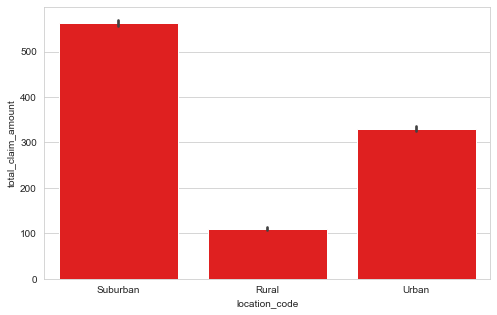

In [90]:
plt.figure(figsize=(8,5))
sns.barplot(x=ordinal['location_code'],y=customer_df['total_claim_amount'], color='red')

In [91]:
loc_dict = {'Rural':0,
            'Urban':1,
            'Suburban':2}


ordinal['location_code'] = ordinal['location_code'].map(loc_dict)


ordinal

,coverage,employmentstatus,location_code,vehicle_size
customer,,,,
BU79786,0,2,2,Medsize
QZ44356,1,0,2,Medsize
AI49188,2,2,2,Medsize
WW63253,0,0,2,Medsize
HB64268,0,2,0,Medsize
...,...,...,...,...
LA72316,0,2,1,Medsize
PK87824,1,2,2,Medsize
TD14365,1,0,2,Medsize


In [92]:
ordinal.vehicle_size.value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

<AxesSubplot:xlabel='vehicle_size', ylabel='total_claim_amount'>

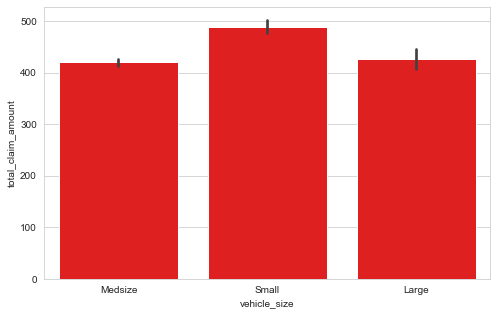

In [93]:
plt.figure(figsize=(8,5))
sns.barplot(x=ordinal['vehicle_size'],y=customer_df['total_claim_amount'], color='red')

In [94]:
car_dict = {'Small':0,
            'Medsize':1,
            'Large':2}


ordinal['vehicle_size'] = ordinal['vehicle_size'].map(car_dict)


ordinal

,coverage,employmentstatus,location_code,vehicle_size
customer,,,,
BU79786,0,2,2,1
QZ44356,1,0,2,1
AI49188,2,2,2,1
WW63253,0,0,2,1
HB64268,0,2,0,1
...,...,...,...,...
LA72316,0,2,1,1
PK87824,1,2,2,1
TD14365,1,0,2,1


In [95]:
ordinal.reset_index(drop=True, inplace=True)
encoded_cat.reset_index(drop=True, inplace=True)
final_cat = pd.concat([ordinal, encoded_cat], axis=1)
final_cat

,coverage,employmentstatus,location_code,vehicle_size,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Married,x1_Single,x2_Personal Auto,x2_Special Auto,x3_Corporate L2,x3_Corporate L3,x3_Personal L1,x3_Personal L2,x3_Personal L3,x3_Special L1,x3_Special L2,x3_Special L3,x4_Offer2,x4_Offer3,x4_Offer4,x5_Branch,x5_Call Center,x5_Web,x6_Luxury Car,x6_Luxury SUV,x6_SUV,x6_Sports Car,x6_Two-Door Car
0,0,2,2,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,2,1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,2,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,2,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,2,0,1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,2,1,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9130,1,2,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9131,1,0,2,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9132,1,2,2,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
numerical_df.shape

(8527, 8)

In [97]:
data = pd.merge(numerical_df, final_cat, how='left', left_index=True, right_index=True)
data = data.drop('total_claim_amount', axis=1)
target = pd.DataFrame(customer_df['total_claim_amount'])
data.reset_index(drop=True, inplace=True)
target.reset_index(drop=True, inplace=True)
data = pd.merge(data, target, how='left', left_index=True, right_index=True)
data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,employmentstatus,location_code,vehicle_size,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Married,x1_Single,x2_Personal Auto,x2_Special Auto,x3_Corporate L2,x3_Corporate L3,x3_Personal L1,x3_Personal L2,x3_Personal L3,x3_Special L1,x3_Special L2,x3_Special L3,x4_Offer2,x4_Offer3,x4_Offer4,x5_Branch,x5_Call Center,x5_Web,x6_Luxury Car,x6_Luxury SUV,x6_SUV,x6_Sports Car,x6_Two-Door Car,total_claim_amount
0,-1.381619,0.398740,0.398740,32,5,0,1,0,2,2,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,384.811147
1,0.296656,0.026017,0.026017,13,42,0,8,1,0,2,1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1131.464935
2,1.145735,0.058302,0.058302,18,38,0,2,2,2,2,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,566.472247
3,0.434579,0.026017,0.026017,18,65,0,7,0,0,2,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,529.881344
4,-1.343642,-0.178714,-0.178714,12,44,0,1,0,2,0,1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8522,1.815812,1.047214,1.047214,23,20,0,2,0,0,2,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,537.600000
8523,-1.145413,-1.450862,-1.450862,14,92,0,4,0,2,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,218.491318
8524,0.531085,0.026017,0.026017,13,19,0,1,1,2,0,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,43.959921
8525,0.410679,-1.427885,-1.427885,8,5,1,2,0,2,1,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,223.728018


In [98]:
data.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
coverage                         0
employmentstatus                 0
location_code                    0
vehicle_size                     0
x0_California                    0
x0_Nevada                        0
x0_Oregon                        0
x0_Washington                    0
x1_Married                       0
x1_Single                        0
x2_Personal Auto                 0
x2_Special Auto                  0
x3_Corporate L2                  0
x3_Corporate L3                  0
x3_Personal L1                   0
x3_Personal L2                   0
x3_Personal L3                   0
x3_Special L1                    0
x3_Special L2                    0
x3_Special L3                    0
x4_Offer2                        0
x4_Offer3           

In [99]:
y = data['total_claim_amount']
X = data.drop('total_claim_amount', axis = 1)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=42)

In [101]:
def modeling_1(y, X, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train )
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    RMSE = mean_squared_error(y_test, predictions, squared=False)
    MSE = mean_squared_error(y_test, predictions)
    MAE = mean_absolute_error(y_test, predictions)
    print("R2 =", round(r2,2)), print("RMSE =", round(RMSE,2)), print("MSE =", round(MSE,2)), print("MAE =", round(MAE,2))
    return predictions, y_test, r2

In [102]:
predictions1, y_test1, r2_1 = modeling_1(y, X, test_size=0.24)

R2 = 0.75
RMSE = 142.58
MSE = 20328.62
MAE = 97.71


In [103]:
def diff_df(y_test, predictions):
    results = pd.DataFrame()
    results['true'] = y_test
    results['pred'] = predictions
    results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
    results = results.sort_values('diff', ascending=False).head(10)
    return results

In [104]:
results = diff_df(y_test, predictions1)
results

,true,pred,diff
5074,2759.794354,1424.149238,1335.645116
248,2345.413441,1278.535339,1066.878102
7978,2069.309854,1042.921096,1026.388758
1626,2201.327879,1203.545242,997.782637
7457,2145.600000,1339.927482,805.672518
5722,1397.954723,633.505226,764.449497
6516,1972.800000,1233.557136,739.242864
7665,1554.089517,831.612365,722.477152
4342,1654.202174,950.127914,704.074260
1383,1965.600000,1290.973182,674.626818


In [105]:
def modeling(y, X, models=[], test_size=0.3):
    for model in models:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        model.fit(X_train, y_train )
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        r2_adj = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
        RMSE = mean_squared_error(y_test, predictions, squared=False)
        MSE = mean_squared_error(y_test, predictions)
        MAE = mean_absolute_error(y_test, predictions)
        print(model, 'metrics are: '), print("R2 =", round(r2,2)), print("R2 adjusted =", round(r2_adj,2)), print("RMSE =", round(RMSE,2)), print("MSE =", round(MSE,2)), print("MAE =", round(MAE,2))
    return predictions, y_test, r2

In [107]:
predictions, y_test, r2 = modeling(y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=10)], test_size=0.24)

LinearRegression() metrics are: 
R2 = 0.75
R2 adjusted = 0.75
RMSE = 142.58
MSE = 20328.62
MAE = 97.71
KNeighborsRegressor(n_neighbors=10) metrics are: 
R2 = 0.23
R2 adjusted = 0.21
RMSE = 250.45
MSE = 62726.14
MAE = 172.97


In [108]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [109]:
predictions, y_test, r2 = modeling(y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=10), MLPRegressor(max_iter=100)], test_size=0.24)

LinearRegression() metrics are: 
R2 = 0.75
R2 adjusted = 0.75
RMSE = 142.58
MSE = 20328.62
MAE = 97.71
KNeighborsRegressor(n_neighbors=10) metrics are: 
R2 = 0.23
R2 adjusted = 0.21
RMSE = 250.45
MSE = 62726.14
MAE = 172.97
MLPRegressor(max_iter=100) metrics are: 
R2 = 0.68
R2 adjusted = 0.67
RMSE = 161.12
MSE = 25961.19
MAE = 103.75


In [110]:
scores = []
for i in range(2,15): 
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'R2')

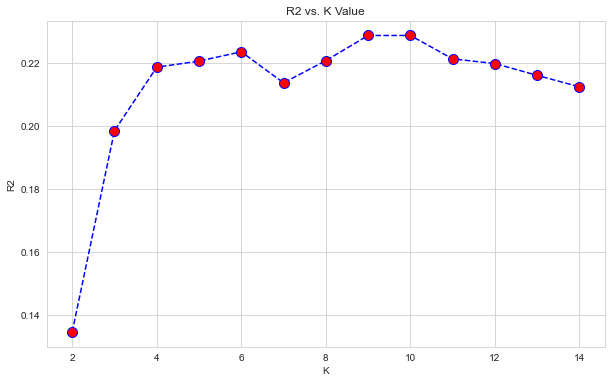

In [111]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15), scores, color = 'blue', linestyle='dashed',
marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

In [112]:
k_predictions, k_y_test, k_r2 = modeling(y, X, models=[KNeighborsRegressor(n_neighbors=10)], test_size=0.24)

KNeighborsRegressor(n_neighbors=10) metrics are: 
R2 = 0.23
R2 adjusted = 0.21
RMSE = 250.45
MSE = 62726.14
MAE = 172.97


In [113]:
LR_predictions, LR_y_test, LR_r2 = modeling(y, X, models=[LinearRegression()],test_size=0.24)

LinearRegression() metrics are: 
R2 = 0.75
R2 adjusted = 0.75
RMSE = 142.58
MSE = 20328.62
MAE = 97.71


In [114]:
MLP_predictions, y_test, MLP_r2 = modeling(y, X, models=[MLPRegressor(max_iter=250)],test_size=0.24)

MLPRegressor(max_iter=250) metrics are: 
R2 = 0.79
R2 adjusted = 0.78
RMSE = 132.23
MSE = 17485.79
MAE = 88.3


In [115]:
MLP_predictions, y_test, MLP_r2 = modeling(y, X, models=[MLPRegressor(max_iter=250)],test_size=0.24)

MLPRegressor(max_iter=250) metrics are: 
R2 = 0.79
R2 adjusted = 0.78
RMSE = 131.8
MSE = 17371.59
MAE = 88.78


In [116]:
k_results = diff_df(y_test, k_predictions)
k_results

,true,pred,diff
5074,2759.794354,568.646473,2191.147881
248,2345.413441,563.533186,1781.880255
1626,2201.327879,422.268067,1779.059812
7457,2145.600000,453.220929,1692.379071
7978,2069.309854,421.974020,1647.335834
6516,1972.800000,575.059277,1397.740723
6262,1823.730828,440.510459,1383.220369
1383,1965.600000,603.250343,1362.349657
7365,1833.182529,481.970658,1351.211871
196,1836.000000,507.461748,1328.538252


In [117]:
LR_results = diff_df(y_test, LR_predictions)
LR_results

,true,pred,diff
5074,2759.794354,1424.149238,1335.645116
248,2345.413441,1278.535339,1066.878102
7978,2069.309854,1042.921096,1026.388758
1626,2201.327879,1203.545242,997.782637
7457,2145.600000,1339.927482,805.672518
5722,1397.954723,633.505226,764.449497
6516,1972.800000,1233.557136,739.242864
7665,1554.089517,831.612365,722.477152
4342,1654.202174,950.127914,704.074260
1383,1965.600000,1290.973182,674.626818


In [118]:
MLP_results = diff_df(y_test, MLP_predictions)
MLP_results

,true,pred,diff
5074,2759.794354,1581.467551,1178.326803
7978,2069.309854,966.509135,1102.800719
248,2345.413441,1399.610144,945.803297
1626,2201.327879,1276.675106,924.652773
5722,1397.954723,673.845296,724.109427
6516,1972.800000,1265.711803,707.088197
7457,2145.600000,1464.585443,681.014557
2260,1176.278800,497.897934,678.380866
7381,1176.278800,498.498322,677.780478
2022,1176.278800,522.104725,654.174075


In [119]:
def we_like_to_see(results):
    beautiful_graph = sns.regplot(results['true'], results['pred'])
    return beautiful_graph

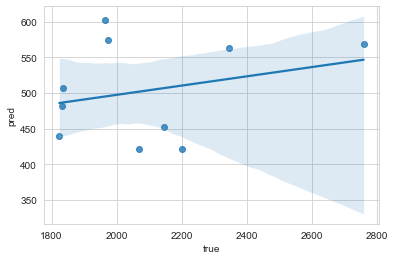

In [120]:
k_beautiful_graph = we_like_to_see(k_results)

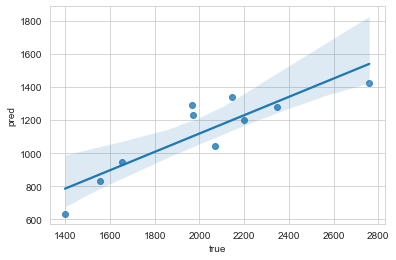

In [121]:
LR_beautiful_graph = we_like_to_see(LR_results)

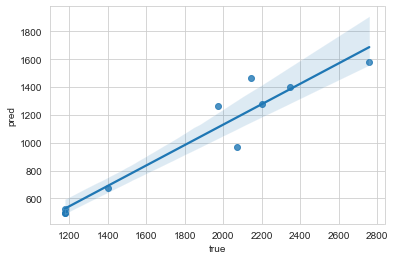

In [122]:
MLP_beautiful_graph = we_like_to_see(MLP_results)

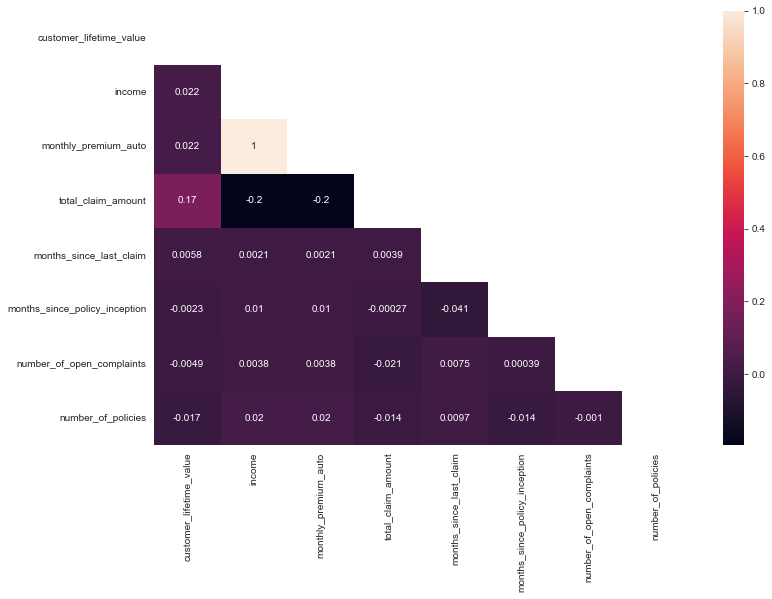

In [123]:
mask = np.zeros_like(numerical_df.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(numerical_df.corr(), mask=mask, annot=True)
plt.show()

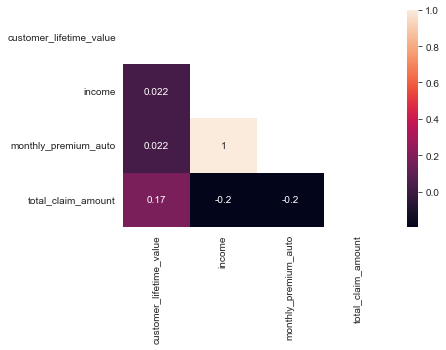

In [124]:
mask = np.zeros_like(continuous.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.heatmap(continuous.corr(), mask=mask, annot=True)
plt.show()

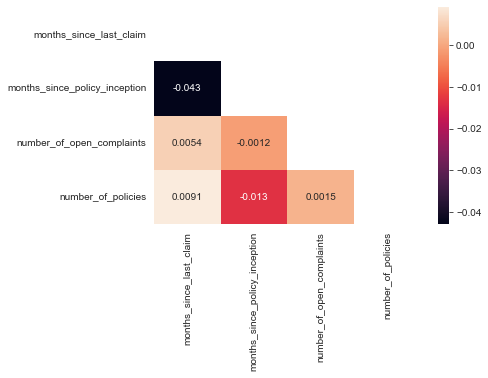

In [125]:
mask = np.zeros_like(discrete_df.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.heatmap(discrete_df.corr(), mask=mask, annot=True)
plt.show()

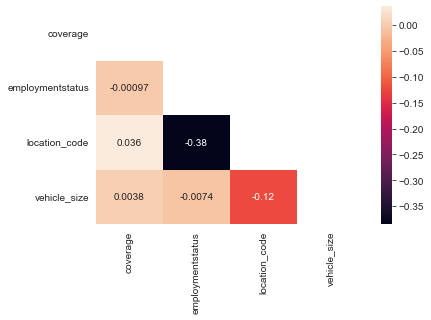

In [126]:
mask = np.zeros_like(ordinal.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.heatmap(ordinal.corr(), mask=mask, annot=True)
plt.show()